In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#TAKE OUT VALUES WHERE LANGUAGE IS NULL

In [2]:
movie_df = pd.read_csv("C:\\Users\\andre\\OneDrive\\Documents\\Py\\Answering Unimportant Qs With Data\\Movie Industry Analysis\\TMDB_all_movies.csv")

In [3]:
#Filter for movies that are already released with revenue (went into theaters)
movie_df = movie_df[movie_df["status"] == "Released"]
movie_df = movie_df[movie_df["revenue"] > 0]
movie_df = movie_df[movie_df["original_language"] == "en"]
movie_df = movie_df[movie_df["release_date"] != None]

In [7]:
movie_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,date,release_year
7,12,Finding Nemo,7.824,18695,Released,2003-05-30,940335536.0,100,94000000.0,tt0266543,...,United States of America,English,"Eliza Schneider, Andrew Stanton, Geoffrey Rush...",Andrew Stanton,"Jeremy Lasky, Sharon Calahan","Andrew Stanton, Adam Bronstein, Blake Tucker, ...","Graham Walters, John Lasseter",Thomas Newman,2003-05-30,2003
11,16,Dancer in the Dark,7.865,1701,Released,2000-09-01,40061153.0,140,12500000.0,tt0168629,...,"Argentina, Denmark, Finland, France, Germany, ...",English,"John Randolph Jones, Björk, Claus Berenhard, A...",Lars von Trier,Robby Müller,"Sjón, Lars von Trier","Leo Pescarolo, Peter Aalbæk Jensen, Vibeke Win...",Björk,2000-09-01,2000
12,17,The Dark,5.800,256,Released,2005-09-28,6593579.0,87,0.0,tt0411267,...,"Germany, United Kingdom","English, Cymraeg","Tonya Smith, Robin Griffith, Sean Bean, Gwenyt...",John Fawcett,Christian Sebaldt,"Simon Maginn, Stephen Massicotte, Rory Gilmartin","Steve Christian, Paul Tamasy, Jeremy Bolt, Pau...",Edmund Butt,2005-09-28,2005
15,20,My Life Without Me,6.000,444,Released,2003-03-07,12300000.0,106,2500000.0,tt0314412,...,"Canada, Spain",English,"Leonor Watling, Camille Martinez, Amanda Plumm...",Isabel Coixet,Jean-Claude Larrieu,"Nanci Kincaid, Isabel Coixet","Agustín Almodóvar, Gordon McLennan, Ogden Gava...",Alfonso Vilallonga,2003-03-07,2003
17,22,Pirates of the Caribbean: The Curse of the Bla...,7.800,19940,Released,2003-07-09,655011224.0,143,140000000.0,tt0325980,...,United States of America,English,"Ian McIntyre, Angus Barnett, Trevor Goddard, V...",Gore Verbinski,Dariusz Wolski,"Stuart Beattie, Terry Rossio, Jay Wolpert, Ted...","Jerry Bruckheimer, Paul Deason, Mike Stenson, ...",Klaus Badelt,2003-07-09,2003


In [3]:
#filter for movies only have the year 2000
movie_df.dropna(subset=['release_date'], inplace=True)
movie_df["date"] = pd.to_datetime(movie_df["release_date"])
movie_df["release_year"] = movie_df["date"].dt.year
movie_df["release_year"] = movie_df["release_year"].astype(int)
movie_df = movie_df[movie_df["release_year"] >= 2000]

In [4]:
#Filter for movies released or produced by United States
movie_df = movie_df.dropna(subset=["production_countries"])
movie_df = movie_df[movie_df["production_countries"].str.contains("United States of America")]

In [9]:
#PARETO PRINCIPLE VALUE
movie_df_p = movie_df[movie_df["release_year"] >= 2014]

In [10]:
movie_df_p.to_excel("C:\\Users\\andre\\OneDrive\\Documents\\Py\\Answering Unimportant Qs With Data\\Movie Industry Analysis\\TMDB_all_movies_pareto.xlsx")

In [37]:
#add columns for profit and profit_with_assumptions
movie_df["profit"] = movie_df["revenue"] - movie_df["budget"]
movie_df["profit_with_assumptions"] = movie_df["revenue"] - (movie_df["budget"]*2)
movie_df = movie_df[movie_df["profit"]>0]

In [38]:
#add field for categorizing budget

def budget_class(budget):
    if budget <= 15000000:
        return "low budget"
    elif budget <= 70000000:
        return "mid budget"
    elif budget > 70000000:
        return "high budget"
    else:
        return "none"
    
movie_df["budget_class"] = movie_df["budget"].apply(budget_class)

C:\Users\andre\AppData\Local\Temp\ipykernel_22192\99174396.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["budget_class"] = movie_df["budget"].apply(budget_class)


In [10]:
movie_df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'date', 'release_year', 'profit',
       'profit_with_assumptions', 'budget_class'],
      dtype='object')

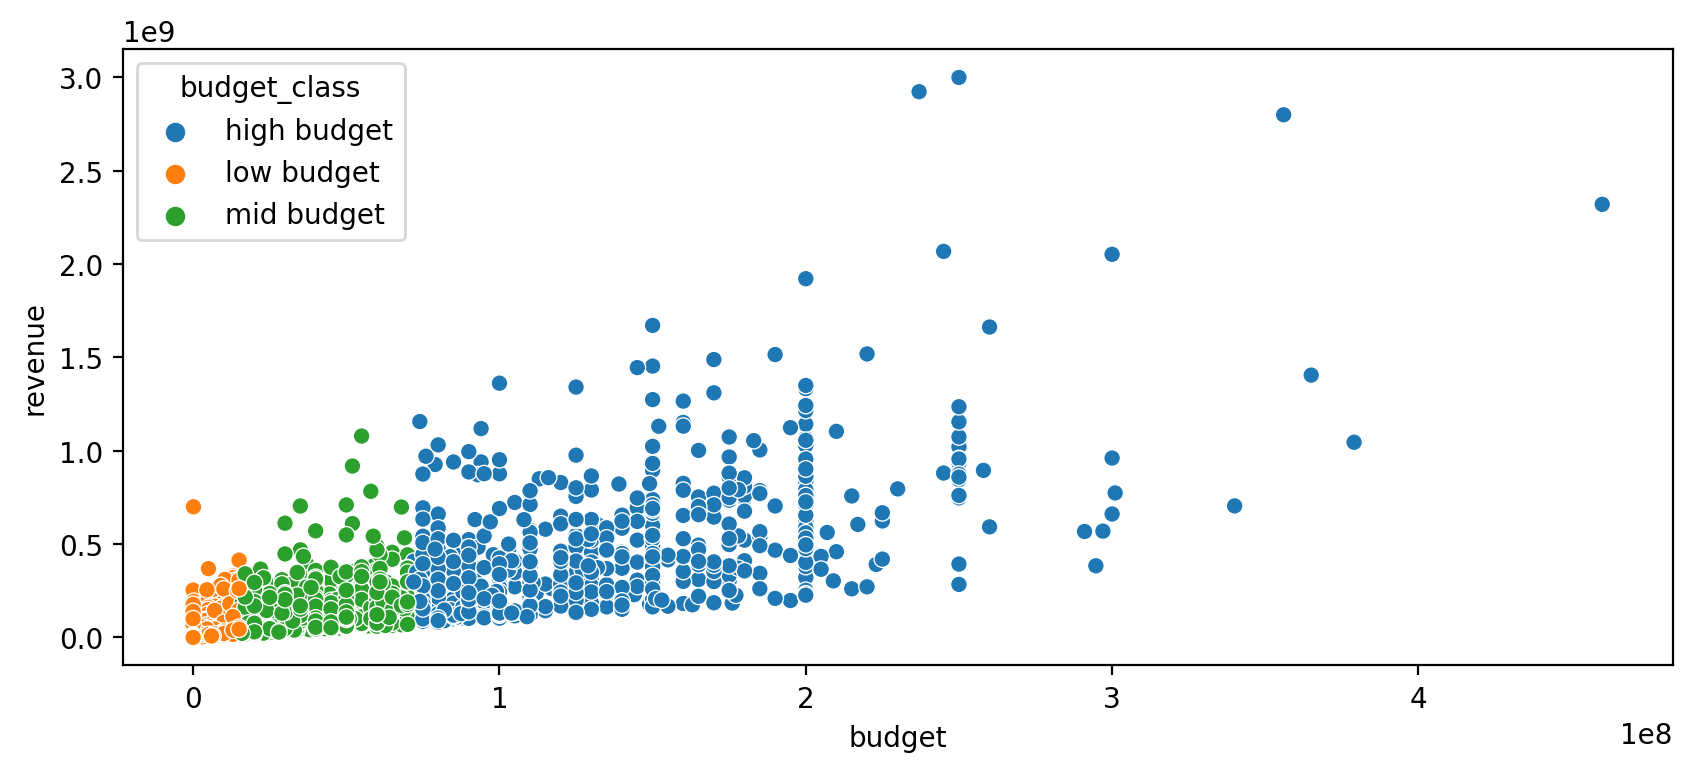

In [39]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='budget',y='revenue',data=movie_df,hue='budget_class')
plt.show()

In [35]:
movie_df_revenue = movie_df[movie_df["revenue"]>1000000]
movie_df_pandemic = movie_df_revenue[movie_df_revenue["release_year"]>=2020]

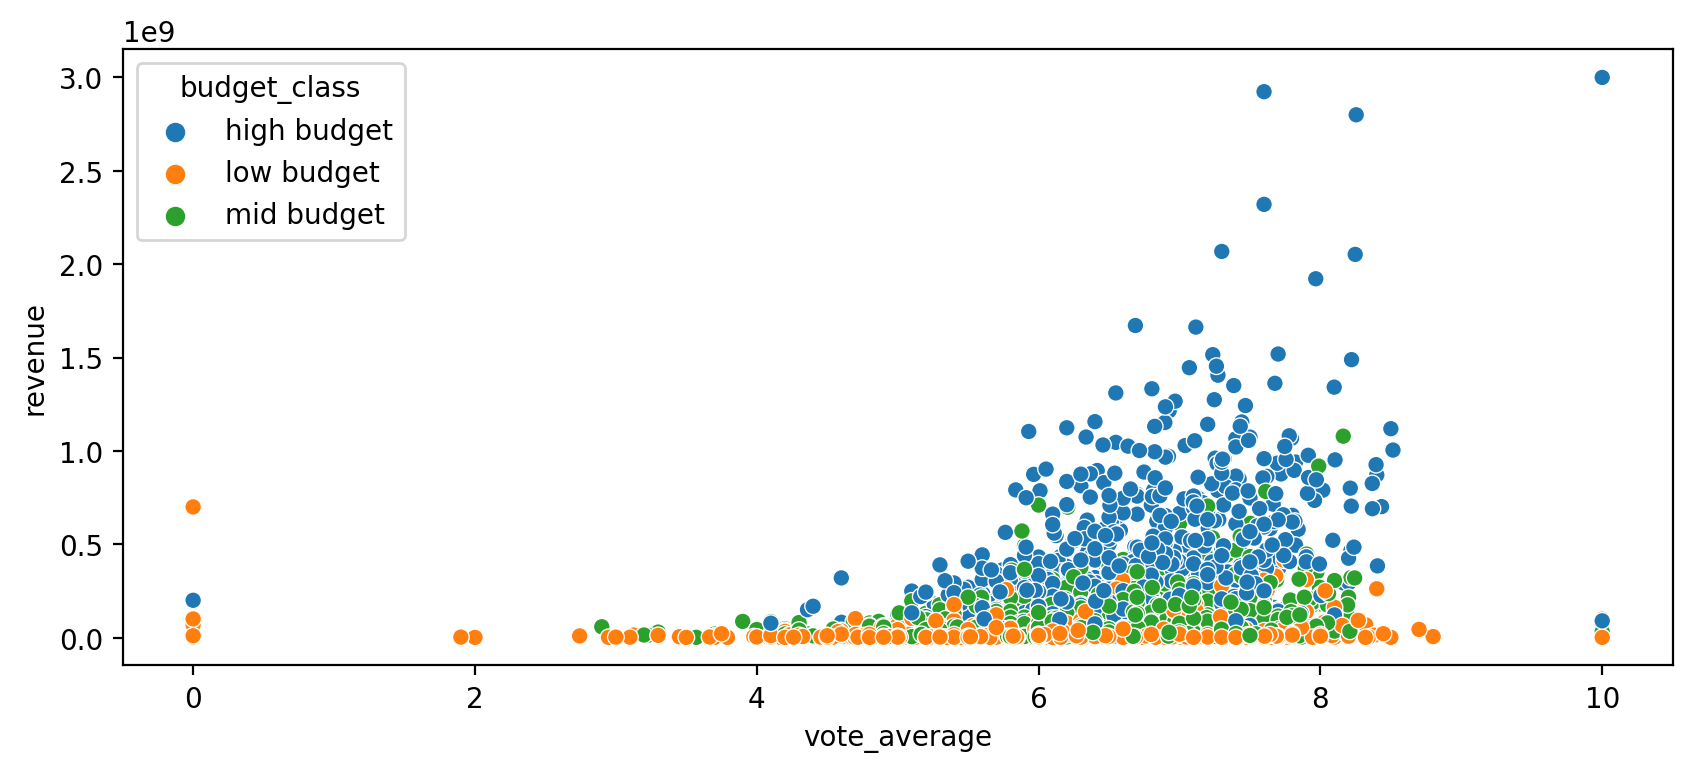

In [31]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='vote_average',y='revenue',data=movie_df_revenue,hue='budget_class')
plt.show()

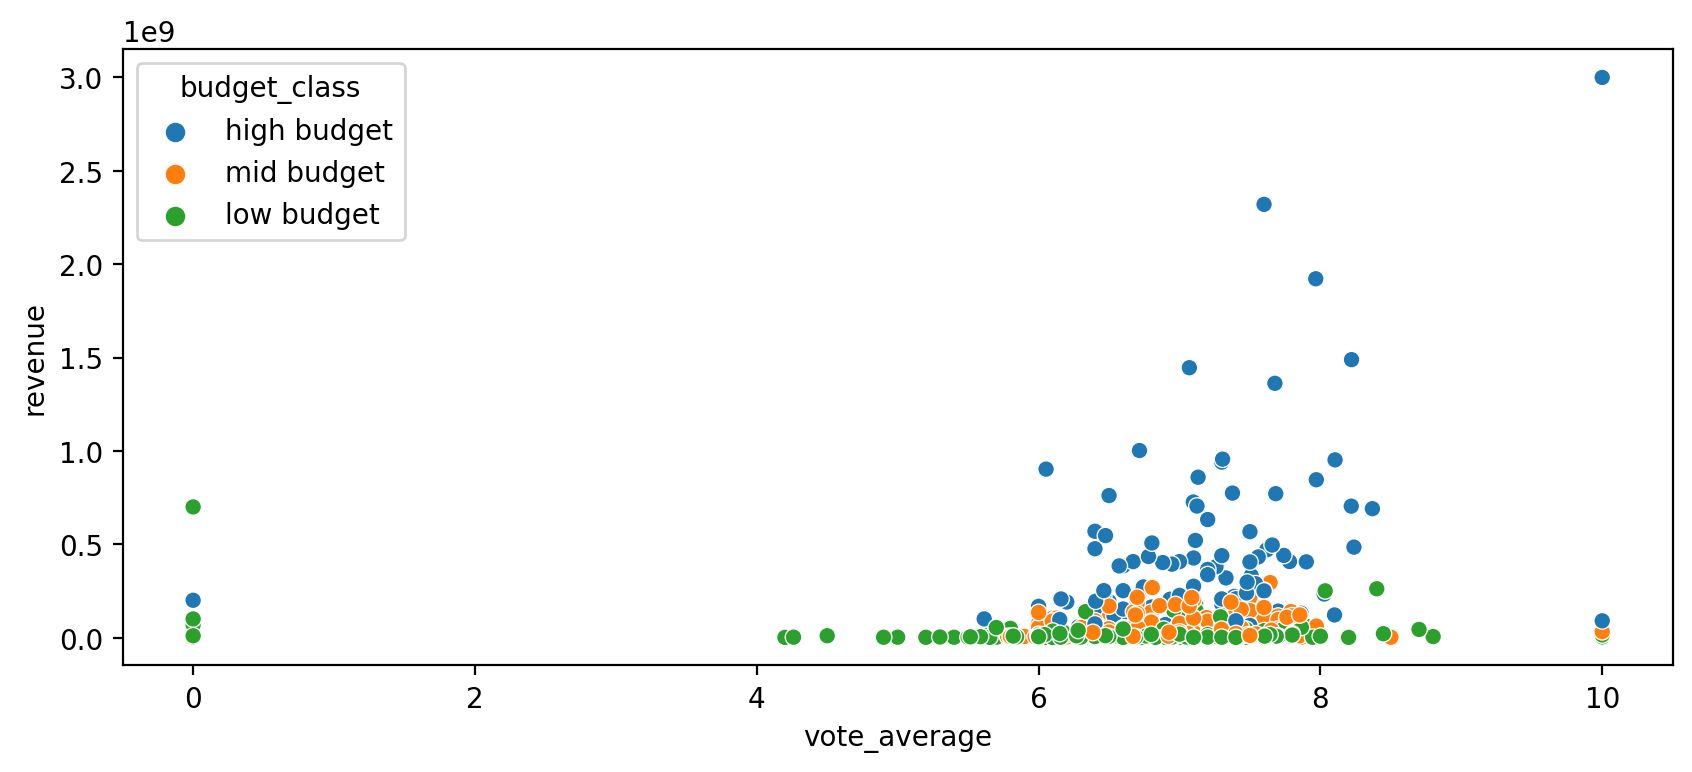

In [36]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='vote_average',y='revenue',data=movie_df_pandemic,hue='budget_class')
plt.show()